<a href="https://colab.research.google.com/github/Sid2601/AutoEncoders/blob/main/Denoising_AutoEndoers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#importing Libraries

In [9]:
import keras
from keras import layers
from keras.datasets import mnist
from keras.layers import Conv2D,Dropout,MaxPooling2D,UpSampling2D
from keras.models import Sequential
from keras.utils import plot_model
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

11493376/11490434 [==============================] - 0s 0us/step


#Add Noise

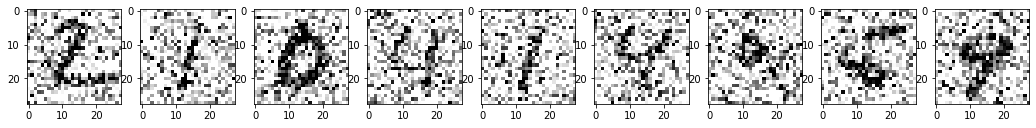

In [3]:
#adding some noise
noise_factor = 0.5
#np.random.normal => random means to obtain random samples and normal means normal or gaussian distribution, i.e. random sample from gaussian distribution
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
#  to make values in the range of 0 to 1, if values < 0 then they will be equal to 0 and values > 1 then they will be equal to 1.
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

#Displaying images with noise
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
plt.show()

#Build Model

In [7]:
model = Sequential()
#Encoding
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.5))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.5))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))

#Decoding 
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         2312      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)          

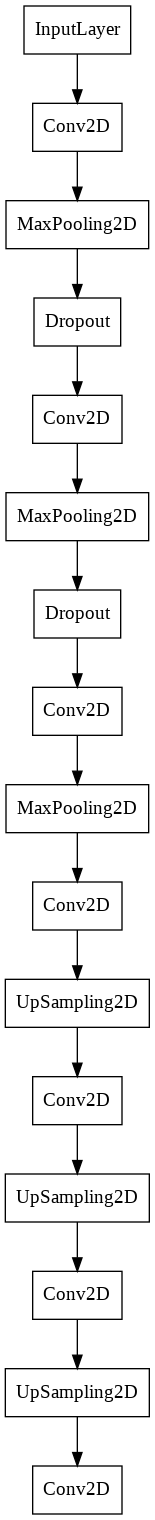

In [10]:
plot_model(model, to_file='denosing_autoencoders.png',show_layer_names=False)

#Fit model on Train Data

In [11]:
model.fit(x_train_noisy, x_train, epochs=10, batch_size=256, shuffle=True, 
          validation_data=(x_test_noisy, x_test))

Epoch 1/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0645 - val_loss: 0.0521
Epoch 2/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0483 - val_loss: 0.0412
Epoch 3/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0424 - val_loss: 0.0341
Epoch 4/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0389 - val_loss: 0.0318
Epoch 5/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0370 - val_loss: 0.0297
Epoch 6/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0357 - val_loss: 0.0289
Epoch 7/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0348 - val_loss: 0.0279
Epoch 8/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0341 - val_loss: 0.0279
Epoch 9/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0335 - val_loss: 0.0266
Epoch 10/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0332 - val_loss: 0.02

#Evaluate Model

In [12]:
model.evaluate(x_test_noisy, x_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0264


0.02638070099055767

#Visulize images

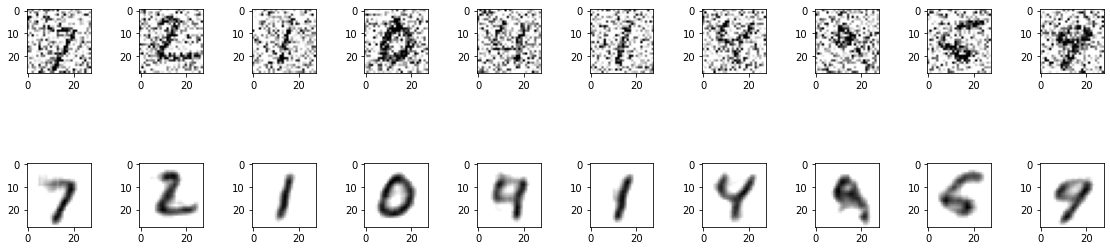

In [13]:
no_noise_img = model.predict(x_test_noisy)

plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
    
    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(no_noise_img[i].reshape(28, 28), cmap="binary")

plt.show()